In [9]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def cal_simi(Xn):
    ##这个数据集的相似度矩阵，最终是二维数组
    simi = []
    for m in Xn:
        ##每个数字与所有数字的相似度列表，即矩阵中的一行
        temp = []
        for n in Xn:
            ##采用负的欧式距离计算相似度
            s = -np.sqrt((m[0] - n[0]) ** 2 + (m[1] - n[1]) ** 2)
            temp.append(s)
        simi.append(temp)

    ##设置参考度，即对角线的值，一般为最小值或者中值
    # p = np.min(simi)   ##11个中心
    # p = np.max(simi)  ##14个中心
    p = np.median(simi)  ##5个中心
    for i in range(dataLen):
        simi[i][i] = p
    return simi

In [4]:
##初始化R矩阵、A矩阵
def init_R(dataLen):
    R = [[0] * dataLen for j in range(dataLen)]
    return R


def init_A(dataLen):
    A = [[0] * dataLen for j in range(dataLen)]
    return A

In [5]:
##迭代更新R矩阵
def iter_update_R(dataLen, R, A, simi):
    old_r = 0  ##更新前的某个r值
    lam = 0.5  ##阻尼系数,用于算法收敛
    ##此循环更新R矩阵
    for i in range(dataLen):
        for k in range(dataLen):
            old_r = R[i][k]
            if i != k:
                max1 = A[i][0] + R[i][0]  ##注意初始值的设置
                for j in range(dataLen):
                    if j != k:
                        if A[i][j] + R[i][j] > max1:
                            max1 = A[i][j] + R[i][j]
                ##更新后的R[i][k]值
                R[i][k] = simi[i][k] - max1
                ##带入阻尼系数重新更新
                R[i][k] = (1 - lam) * R[i][k] + lam * old_r
            else:
                max2 = simi[i][0]  ##注意初始值的设置
                for j in range(dataLen):
                    if j != k:
                        if simi[i][j] > max2:
                            max2 = simi[i][j]
                ##更新后的R[i][k]值
                R[i][k] = simi[i][k] - max2
                ##带入阻尼系数重新更新
                R[i][k] = (1 - lam) * R[i][k] + lam * old_r
    print("max_r:" + str(np.max(R)))
    # print(np.min(R))
    return R


'''
    第四步：计算归属度矩阵，即A
'''


##迭代更新A矩阵
def iter_update_A(dataLen, R, A):
    old_a = 0  ##更新前的某个a值
    lam = 0.5  ##阻尼系数,用于算法收敛
    ##此循环更新A矩阵
    for i in range(dataLen):
        for k in range(dataLen):
            old_a = A[i][k]
            if i == k:
                max3 = R[0][k]  ##注意初始值的设置
                for j in range(dataLen):
                    if j != k:
                        if R[j][k] > 0:
                            max3 += R[j][k]
                        else:
                            max3 += 0
                A[i][k] = max3
                ##带入阻尼系数更新A值
                A[i][k] = (1 - lam) * A[i][k] + lam * old_a
            else:
                max4 = R[0][k]  ##注意初始值的设置
                for j in range(dataLen):
                    ##上图公式中的i!=k 的求和部分
                    if j != k and j != i:
                        if R[j][k] > 0:
                            max4 += R[j][k]
                        else:
                            max4 += 0

                ##上图公式中的min部分
                if R[k][k] + max4 > 0:
                    A[i][k] = 0
                else:
                    A[i][k] = R[k][k] + max4

                ##带入阻尼系数更新A值
                A[i][k] = (1 - lam) * A[i][k] + lam * old_a
    print("max_a:" + str(np.max(A)))
    # print(np.min(A))
    return A

In [6]:
##计算聚类中心
def cal_cls_center(dataLen, simi, R, A):
    ##进行聚类，不断迭代直到预设的迭代次数或者判断comp_cnt次后聚类中心不再变化
    max_iter = 100  ##最大迭代次数
    curr_iter = 0  ##当前迭代次数
    max_comp = 30  ##最大比较次数
    curr_comp = 0  ##当前比较次数
    class_cen = []  ##聚类中心列表，存储的是数据点在Xn中的索引
    while True:
        ##计算R矩阵
        R = iter_update_R(dataLen, R, A, simi)
        ##计算A矩阵
        A = iter_update_A(dataLen, R, A)
        ##开始计算聚类中心
        for k in range(dataLen):
            if R[k][k] + A[k][k] > 0:
                if k not in class_cen:
                    class_cen.append(k)
                else:
                    curr_comp += 1
        curr_iter += 1
        print(curr_iter)
        if curr_iter >= max_iter or curr_comp > max_comp:
            break
    return class_cen

In [14]:
x1=[]
x2=[]
file_path = 'E:\\cluster\\data.out'
with open(file_path,'r',encoding='utf8') as f:
    lines=f.readlines()
temps = lines[0].split(',')
for temp in temps:
    x1.append(float(temp))

temps = lines[1].split(',')
for temp in temps:
    x2.append(float(temp))

print(len(x2))
        
x_=np.array(x1)
x_.reshape(515,1)
y_=np.array(x2)
y_.reshape(515,1)

xn=np.array([x_,y_])
Xn=np.transpose(xn)
dataLen = len(Xn)

ValueError: could not convert string to float: 

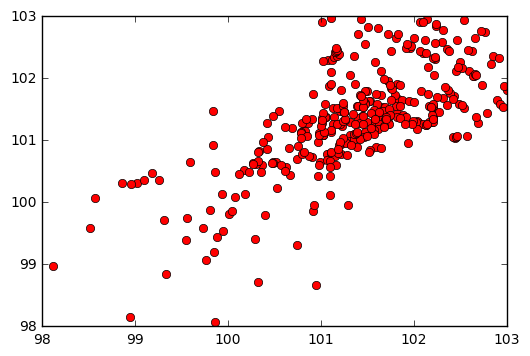

In [40]:
x1=[101.657,101.52,101.513,101.597,101.819,102.123,101.878,101.912,102.046,102.029,102.439,102.42,102.09,101.021,100.684,100.809,100.612,100.987,101.587,101.022,100.829,100.42,99.8356,101.643,101.571,101.382,101.394,101.455,101.745,102.13,101.817,101.848,102.023,101.988,102.565,101.441,101.205,101.247,101.247,101.579,102.033,101.649,101.636,101.721,101.577,102.449,100.365,99.0227,99.8597,99.2612,101.52,98.9564,101.396,101.043,101.134,101.054,101.581,102.196,101.69,101.688,102.159,101.306,100.859,101.004,100.793,101.46,102.2,101.581,101.496,101.228,100.425,100.786,99.8318,101.422,102.536,101.694,101.019,99.0949,100.33,100.422,101.102,98.5639,100.316,101.826,101.012,101.245,101.466,102.449,102.357,102.377,102.294,102.497,102.585,102.639,102.634,102.726,102.887,102.924,102.959,101.446,101.129,101.202,101.169,101.621,102.138,101.715,101.729,101.978,101.901,102.681,101.08,100.487,100.739,100.304,101.067,101.932,101.155,100.897,100.514,98.8559,102.46,101.285,101.309,100.756,100.961,100.652,101.47,102.197,101.608,101.563,102.206,101.208,100.477,100.799,100.173,101.31,102.197,101.465,101.261,101.192,99.9359,100.622,98.1178,101.353,102.425,101.675,100.983,100.004,99.7303,102.657,102.848,101.101,100.04,101.799,100.981,101.256,101.472,102.226,101.818,101.722,101.676,101.849,102.072,102.307,102.148,102.243,102.487,102.515,102.781,101.645,101.488,101.476,101.586,101.867,102.19,101.945,102.003,102.198,102.154,102.663,100.077,99.3132,101.509,101.453,101.128,101.197,101.167,101.686,102.203,101.802,101.844,102.352,101.342,100.898,101.039,100.841,101.537,102.185,101.666,101.618,101.236,100.377,100.784,99.5919,101.455,102.39,101.726,101.019,98.5193,100.269,100.316,102.661,102.913,101.102,100.262,101.753,101.022,101.236,101.419,102.206,102.995,101.267,100.573,100.867,100.35,101.414,102.199,101.569,101.493,102.268,101.152,100.177,100.665,99.553,101.209,102.194,101.388,101.058,101.177,99.5515,100.529,101.322,102.364,101.672,100.964,99.7578,98.9456,102.51,102.757,102.624,101.1,99.8475,101.764,100.976,101.255,101.452,102.1,100.942,102.971,101.366,100.852,101.03,100.784,101.581,102.203,101.724,101.739,102.418,101.234,100.473,100.815,100.121,101.369,102.185,101.533,101.358,101.198,99.8015,100.607,101.378,102.329,101.702,100.979,99.8791,99.3272,102.468,102.716,102.581,101.101,99.9437,101.736,100.995,101.245,101.426,102.061,102.533,102.649,102.824,102.139,102.235,102.307,102.461,101.358,101.076,101.12,101.017,101.751,101.957,101.914,101.085,99.1791,100.544,100.907,101.964,102.067,101.999,101.104,100.484,101.466,101.136,101.166,101.189,101.613,100.742,99.8612,102.197,100.323,101.154,100.29,101.281,102.215,101.696,100.917,102.223,102.236,102.229,101.1,101.641,101.006,101.232,101.361,101.809,101.185,100.4,101.383,102.144,101.753,100.925,102.129,102.098,102.117,101.1,101.583,101.041,101.215,101.312,101.714,101.926,101.826,101.099,101.399,101.146,101.16,101.167,101.428,101.501,101.104,100.222,101.011,101.107,101.155]
x2=[101.547,101.635,101.639,101.585,101.443,101.248,101.405,101.384,101.298,101.309,101.047,101.058,101.27,101.083,101.194,101.153,101.218,101.094,100.895,101.082,101.146,101.282,101.475,100.877,101.484,101.562,101.557,101.532,101.412,101.253,101.382,101.37,101.298,101.312,101.074,101.389,101.469,101.455,101.455,101.342,101.189,101.319,101.323,101.295,101.343,101.049,100.604,100.318,100.496,100.369,100.85,100.304,101.357,101.384,101.377,101.383,101.343,101.296,101.335,101.335,101.299,101.291,101.286,101.288,101.286,101.292,101.299,101.293,101.292,101.234,101.058,101.137,100.927,101.276,101.521,101.336,101.081,100.356,100.822,100.856,101.142,100.076,100.812,101.67,101.367,101.454,101.606,102.125,102.481,102.449,102.58,102.26,102.123,102.037,102.045,101.9,101.648,101.59,101.534,101.266,101.264,101.264,101.264,101.267,101.27,101.268,101.268,101.269,101.269,101.274,100.778,100.654,100.707,100.615,100.775,100.956,100.794,100.739,100.659,100.312,101.067,99.9666,101.083,100.909,100.973,100.876,101.133,101.362,101.177,101.163,101.365,100.949,100.644,100.778,100.518,100.991,101.361,101.056,100.971,100.927,100.13,100.566,98.9762,101.029,101.709,101.233,100.648,99.8199,99.5884,102.064,102.357,100.805,99.8635,101.736,101.123,101.329,101.589,102.306,101.917,101.964,101.986,101.902,101.792,101.677,101.755,101.708,101.589,101.575,101.445,101.736,101.79,101.794,101.757,101.66,101.549,101.633,101.613,101.546,101.561,101.386,100.095,99.7138,100.81,101.535,101.523,101.526,101.525,101.544,101.563,101.548,101.55,101.569,101.419,101.353,101.374,101.344,101.448,101.544,101.467,101.46,101.308,100.967,101.128,100.654,101.395,101.767,101.503,101.081,99.5887,100.633,100.661,102.061,102.334,101.167,100.626,101.849,101.445,101.563,101.739,102.323,101.813,100.953,100.607,100.753,100.496,101.026,101.417,101.103,101.065,101.452,100.752,100.14,100.446,99.7486,100.787,101.405,100.9,100.692,100.794,99.4012,100.239,100.919,101.812,101.219,100.422,99.0649,98.1509,102.161,102.753,102.436,100.661,99.2014,101.822,101.083,101.344,101.645,102.41,98.676,101.871,101.263,101.069,101.136,101.043,101.345,101.58,101.399,101.404,101.661,101.038,100.638,100.818,100.453,101.109,101.539,101.196,101.104,100.977,99.8751,100.511,101.119,101.87,101.375,100.607,99.4368,98.8499,102.189,102.762,102.451,100.813,99.5322,101.89,101.23,101.453,101.72,102.441,102.944,102.659,102.231,102.954,102.853,102.777,102.615,102.357,102.291,102.301,102.277,102.449,102.497,102.487,101.875,100.468,101.475,101.743,102.524,102.91,102.656,101.908,101.391,102.548,102.349,102.367,102.399,102.807,99.3098,98.0737,101.352,98.7215,100.598,99.4074,100.773,102.061,101.346,99.8562,102.352,102.872,102.575,100.428,102.122,101.323,101.607,101.907,102.647,100.867,99.7911,101.139,102.181,101.646,99.9518,102.414,102.903,102.615,100.568,102.264,101.592,101.808,102.048,102.724,102.55,102.717,100.124,102.712,102.423,102.439,102.463,102.958,102.832,102.106,100.49,102.909,102.971,102.497]

plt.plot(x1,x2,'ro')
plt.show()
x_=np.array(x1)
x_.reshape(371,1)
y_=np.array(x2)
y_.reshape(371,1)

xn=np.array([x_,y_])
Xn=np.transpose(xn)
dataLen = len(Xn)

In [28]:
if __name__ == '__main__':
    ##初始化数据
    #Xn, dataLen = init_sample()
    #print(Xn)
    ##初始化R、A矩阵
   
    R = init_R(dataLen)
    A = init_A(dataLen)
    ##计算相似度
    simi = cal_simi(Xn)
    ##输出聚类中心
    class_cen = cal_cls_center(dataLen, simi, R, A)
    for i in class_cen:
        print(str(i)+":"+str(Xn[i]))
    # print(class_cen)

    ##根据聚类中心划分数据
    c_list = []
    for m in Xn:
        temp = []
        for j in class_cen:
            n = Xn[j]
            d = -np.sqrt((m[0] - n[0]) ** 2 + (m[1] - n[1]) ** 2)
            temp.append(d)
        ##按照是第几个数字作为聚类中心进行分类标识
        c = class_cen[temp.index(np.max(temp))]
        c_list.append(c)
        
        
        

max_r:0.0
max_a:-0.00728868986856
1
max_r:0.47725041464
max_a:1.74106360836
2
max_r:0.722730488806
max_a:1.52364999987
3
max_r:0.946393040891
max_a:3.27713566662
4
max_r:1.23864664339
max_a:5.79399673031
5
max_r:1.61779490964
max_a:8.79741863408
6
max_r:2.03308767635
max_a:12.2699476866
7
13:[ 101.021  101.083]
46:[ 100.365  100.604]
110:[ 101.08   100.778]
1:[ 101.52   101.635]
41:[ 101.649  101.319]
47:[  99.0227  100.318 ]
87:[ 102.449  102.125]
88:[ 102.357  102.481]
174:[ 102.19   101.549]
302:[ 101.358  102.357]
331:[ 101.696  101.346]


In [35]:
x1 = 101.021
    

112.72727272727273

In [30]:
import random

371


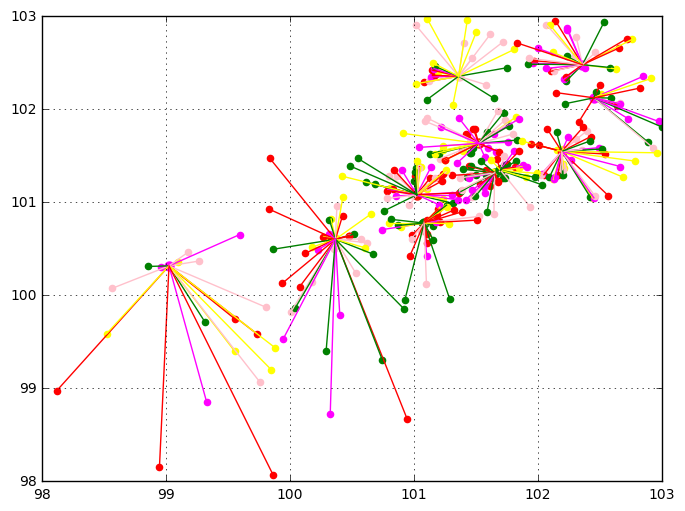

In [32]:
 ##画图
colors = ['red', 'magenta', 'pink', 'green', 'yellow']
plt.figure(figsize=(8, 6))
plt.grid(True, which='major')  # x坐标轴的网格使用主刻度
# plt.grid(True, which='minor')  # y坐标轴的网格使用次刻度
plt.xlim([98, 103])
plt.ylim([98, 103])
print(len(c_list))
for i in range(dataLen):
    d1 = Xn[i]
    d2 = Xn[c_list[i]]
    #c = class_cen.index(c_list[i])
    c=random.randint(0,4)
    plt.plot([d2[0], d1[0]], [d2[1], d1[1]], color=colors[c], linewidth=1)
    if i == c_list[i] :
        plt.scatter(d1[0],d1[1],color=colors[c],linewidth=3)
    else : 
        plt.scatter(d1[0],d1[1],color=colors[c],linewidth=1)
plt.show()